In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

# Question 1

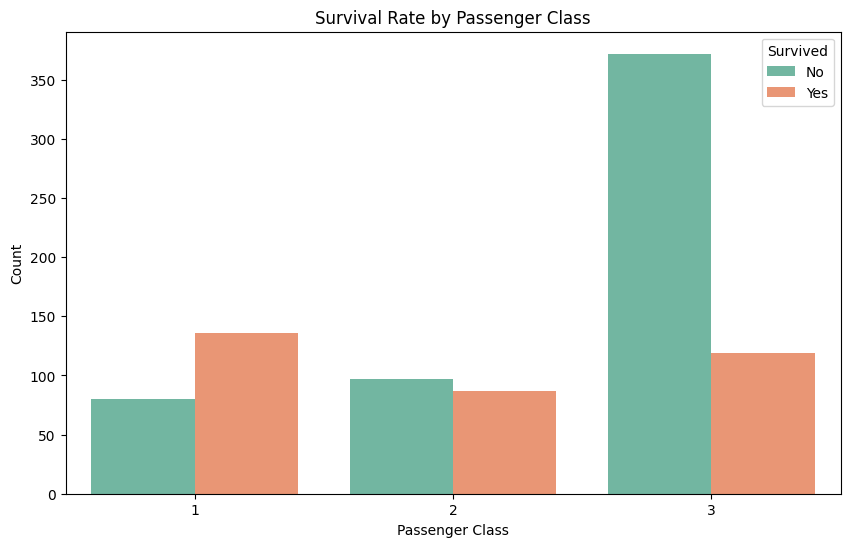

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [3]:
# A bar plot to show survival rate across different passenger classes
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Calculate and print the survival rate for each class
survival_rate = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Class:")
print(survival_rate)

# Question 2

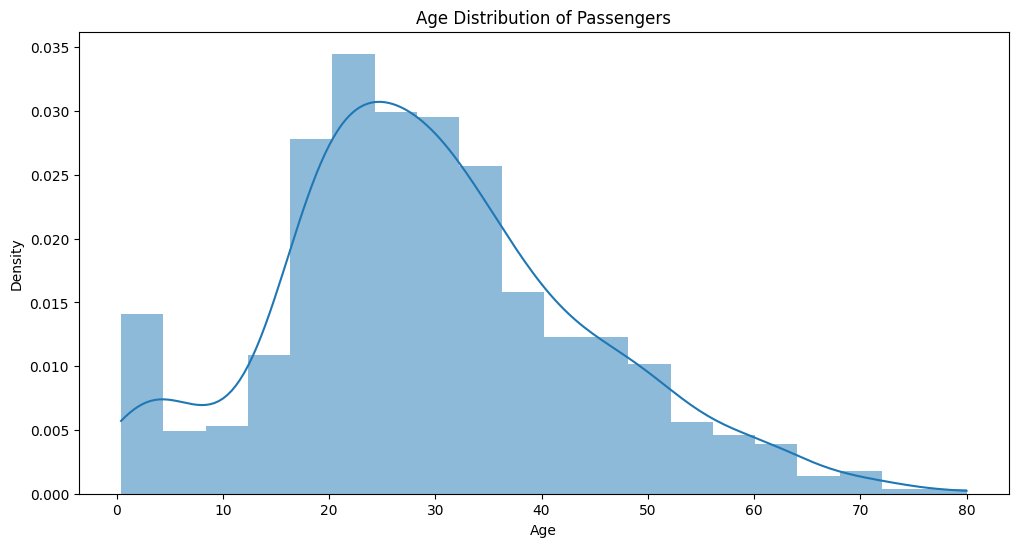

Age Distribution Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [6]:
# Question 2:
# A KDE and histogram to show the age distribution of passengers

plt.figure(figsize=(12, 6))
sns.histplot(data=df['Age'].dropna(), kde=True, stat="density", linewidth=0)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Print some statistics about the age distribution
print("Age Distribution Statistics:")
print(df['Age'].describe())

## Comments on age distribution patterns:

- The distribution appears to be right-skewed, indicating a higher concentration of younger passengers.
- There seems to be a peak around the late 20s to early 30s.
- There are fewer passengers in the older age ranges.

# Question 3

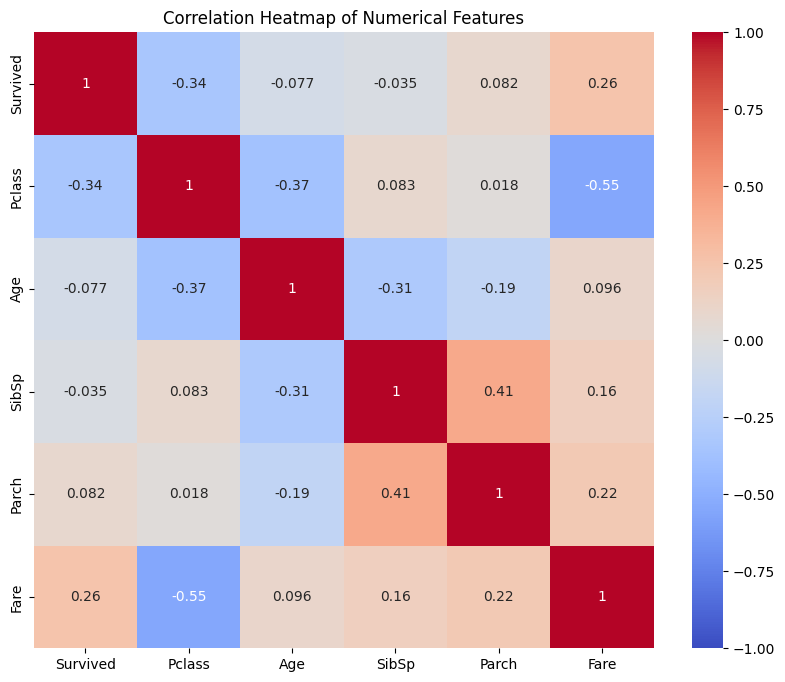

In [7]:
# Selecting numerical features for correlation analysis
numerical_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Create a correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Question 4

<Figure size 1200x600 with 0 Axes>

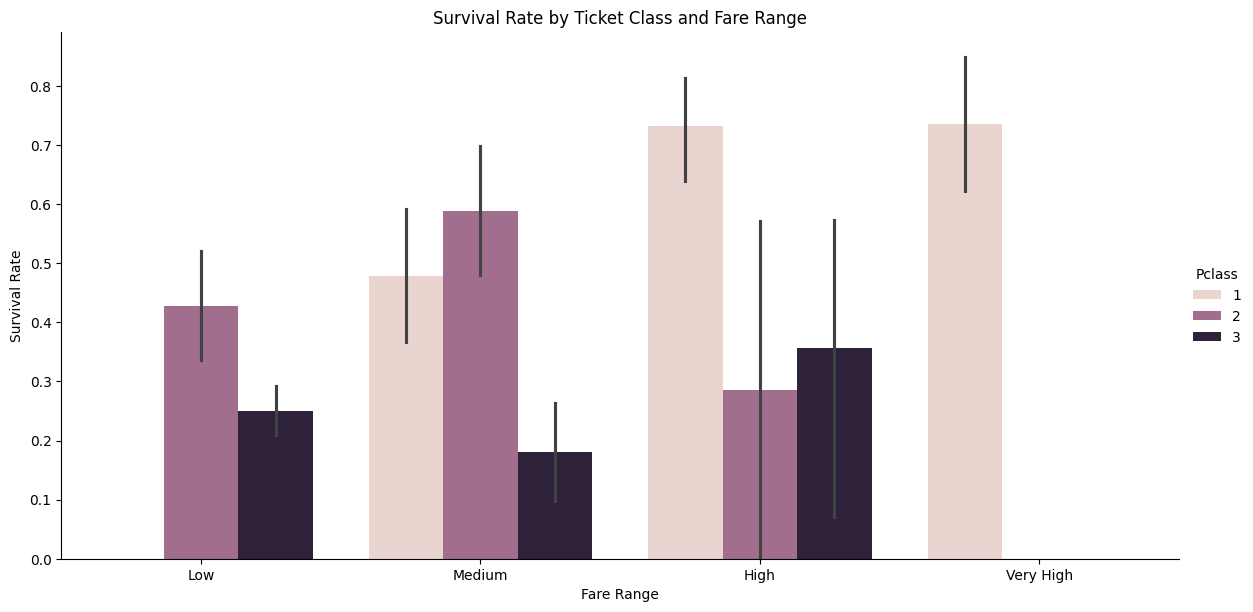

Survival Rate by Fare Range and Class:
Pclass            1         2         3
FareRange                              
Low        0.000000  0.428571  0.249377
Medium     0.478873  0.589041  0.180556
High       0.732558  0.285714  0.357143
Very High  0.735849       NaN       NaN


In [9]:
# Bin the fare data into ranges
df['FareRange'] = pd.cut(df['Fare'], bins=[0, 20, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Very High'])

# Create a catplot to show survival rates across fare ranges and classes
plt.figure(figsize=(12, 6))
sns.catplot(x='FareRange', y='Survived', hue='Pclass', data=df, kind='bar', height=6, aspect=2)
plt.title('Survival Rate by Ticket Class and Fare Range')
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate')
plt.show()

# Calculate and print the survival rate for each fare range and class
survival_rate = df.groupby(['FareRange', 'Pclass'], observed=True)['Survived'].mean().unstack()
print("Survival Rate by Fare Range and Class:")
print(survival_rate)

## Analysis of how fare and class together impact survival:

- Higher fare ranges generally correspond to higher survival rates across all classes.
- First-class passengers have higher survival rates in all fare ranges compared to second and third-class passengers.
- The difference in survival rates between classes is more pronounced in higher fare ranges.
- Third-class passengers have the lowest survival rates across all fare ranges.